In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_new.csv")
df = df.drop(columns=["Unnamed: 0", "title", "country", "rating"])
print(df.head(10))
print(df.info())

      type  release_year   duration  day_added  year_added  month_added  \
0    Movie          1993    125 min         24        2021            9   
1  TV Show          2021  9 Seasons         24        2021            9   
2    Movie          2021    104 min         24        2021            9   
3    Movie          2021    127 min         23        2021            9   
4    Movie          1998    166 min         21        2021            9   
5    Movie          2010    103 min         20        2021            9   
6    Movie          2013     97 min         19        2021            9   
7    Movie          2013    106 min         19        2021            9   
8    Movie          2017     96 min         16        2021            9   
9    Movie          1975    124 min         16        2021            9   

   Show_id  
0        8  
1        9  
2       10  
3       13  
4       25  
5       28  
6       29  
7       30  
8       39  
9       42  
<class 'pandas.core.frame.DataF

In [3]:
# df["Type"] = df["type"]
# mapping = {'Movie': 1, 'TV Show': 0}

# # Use map() function to replace values in 'type' column
# df['type'] = df['type'].map(mapping)

# # Display the updated DataFrame
# print(df)

In [4]:
# df["Duration"]  =df["duration"]
df['duration_numeric'] = df['duration'].str.extract('(\d+)')

# Convert the extracted numeric data to integer
df['duration_numeric'] = df['duration_numeric'].astype(int)

# Extract text data from 'duration' column by removing numeric data
df['duration_text'] = df['duration'].str.replace('\d+', '').str.strip()

# Display the updated DataFrame
print(df)

         type  release_year   duration  day_added  year_added  month_added  \
0       Movie          1993    125 min         24        2021            9   
1     TV Show          2021  9 Seasons         24        2021            9   
2       Movie          2021    104 min         24        2021            9   
3       Movie          2021    127 min         23        2021            9   
4       Movie          1998    166 min         21        2021            9   
...       ...           ...        ...        ...         ...          ...   
5327    Movie          2015     96 min          9        2016            3   
5328    Movie          2007    158 min         20        2019           11   
5329    Movie          2009     88 min          1        2019           11   
5330    Movie          2006     88 min         11        2020            1   
5331    Movie          2015    111 min          2        2019            3   

      Show_id  duration_numeric duration_text  
0           8  

/var/folders/k7/mwwt9j8948jf_dtzxkc5ngy80000gn/T/ipykernel_97482/2924989905.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['duration_text'] = df['duration'].str.replace('\d+', '').str.strip()


In [6]:
df = df.drop(columns=[ "duration", "duration_text"])
df

,type,release_year,day_added,year_added,month_added,Show_id,duration_numeric
0,Movie,1993,24,2021,9,8,125
1,TV Show,2021,24,2021,9,9,9
2,Movie,2021,24,2021,9,10,104
3,Movie,2021,23,2021,9,13,127
4,Movie,1998,21,2021,9,25,166
...,...,...,...,...,...,...,...
5327,Movie,2015,9,2016,3,8802,96
5328,Movie,2007,20,2019,11,8803,158
5329,Movie,2009,1,2019,11,8805,88
5330,Movie,2006,11,2020,1,8806,88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              5332 non-null   object
 1   release_year      5332 non-null   int64 
 2   day_added         5332 non-null   int64 
 3   year_added        5332 non-null   int64 
 4   month_added       5332 non-null   int64 
 5   Show_id           5332 non-null   int64 
 6   duration_numeric  5332 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 291.7+ KB


In [8]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=321)
train_df["type"] = train_df["type"]
test_df["type"] = test_df["type"]


In [9]:
X_train = train_df.drop(columns="type")
y_train = train_df["type"]
X_test = test_df.drop(columns="type")
y_test = test_df["type"]

In [10]:
X_train.head()

,release_year,day_added,year_added,month_added,Show_id,duration_numeric
1618,2020,5,2020,2,2950,106
3061,2016,1,2017,4,5552,81
2682,2017,25,2018,4,4917,97
2643,2018,25,2018,5,4851,94
4041,2015,31,2017,3,6973,95


In [11]:
y_train

1618    Movie
3061    Movie
2682    Movie
2643    Movie
4041    Movie
        ...  
168     Movie
1425    Movie
3784    Movie
2847    Movie
4220    Movie
Name: type, Length: 3732, dtype: object

In [76]:
X_test.head()

,release_year,day_added,year_added,month_added,Show_id,duration_numeric
3335,2010,3,2019,4,5991,113
4159,2015,25,2016,8,7141,1
2494,2013,1,2018,10,4600,122
690,2021,15,2021,1,1411,96
2941,2016,1,2017,8,5354,80


In [77]:
y_test

3335      Movie
4159    TV Show
2494      Movie
690       Movie
2941      Movie
         ...   
4136      Movie
656       Movie
3742      Movie
67        Movie
1558      Movie
Name: type, Length: 1600, dtype: object

In [12]:
train_df

,type,release_year,day_added,year_added,month_added,Show_id,duration_numeric
1618,Movie,2020,5,2020,2,2950,106
3061,Movie,2016,1,2017,4,5552,81
2682,Movie,2017,25,2018,4,4917,97
2643,Movie,2018,25,2018,5,4851,94
4041,Movie,2015,31,2017,3,6973,95
...,...,...,...,...,...,...,...
168,Movie,2016,1,2021,8,353,105
1425,Movie,2020,25,2020,4,2630,138
3784,Movie,2019,13,2019,9,6599,87
2847,Movie,2017,5,2017,11,5184,153


In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
predictions = model.predict(X_test)

In [15]:
nb_cm = confusion_matrix(y_test, predictions)

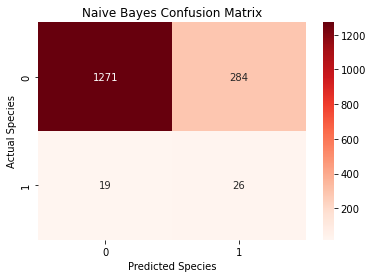

In [16]:
sns.heatmap(nb_cm, annot=True, cmap="Reds", fmt="d")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC()

In [19]:
svm.fit(X_train,y_train)

SVC()

In [20]:
svm_pred= svm.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix 

In [22]:
cm = confusion_matrix(y_test, svm_pred)
cm

array([[1555,    0],
       [  45,    0]])

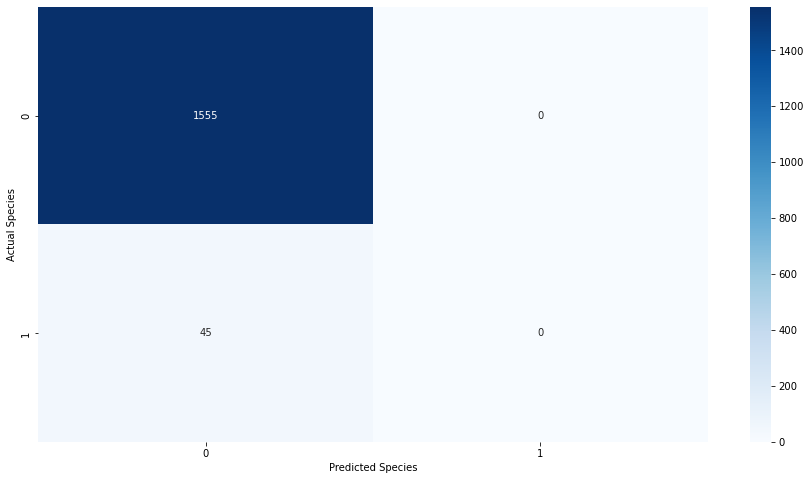

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, svm_pred)

0.971875

In [26]:
#Tuning the C parameters

In [27]:
svm = SVC(kernel = 'rbf', C = 150)

In [28]:
svm.fit(X_train, y_train)

SVC(C=150)

In [29]:
svm_pred_1 = svm.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, svm_pred_1)
cm

array([[1546,    9],
       [   6,   39]])

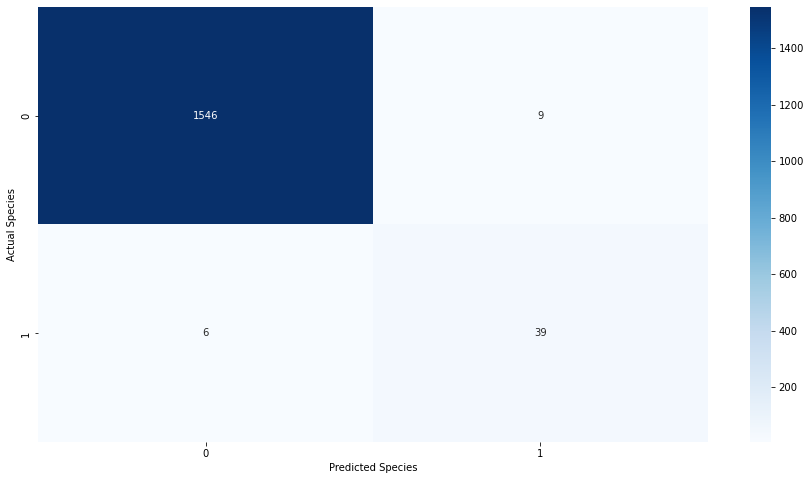

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [32]:
accuracy_score(y_test, svm_pred_1)

0.990625

In [33]:
svm = SVC(kernel = 'rbf', C = 200)

In [34]:
svm.fit(X_train,y_train)

SVC(C=200)

In [35]:
svm_pred_2 = svm.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, svm_pred_2)
cm

array([[1545,   10],
       [   2,   43]])

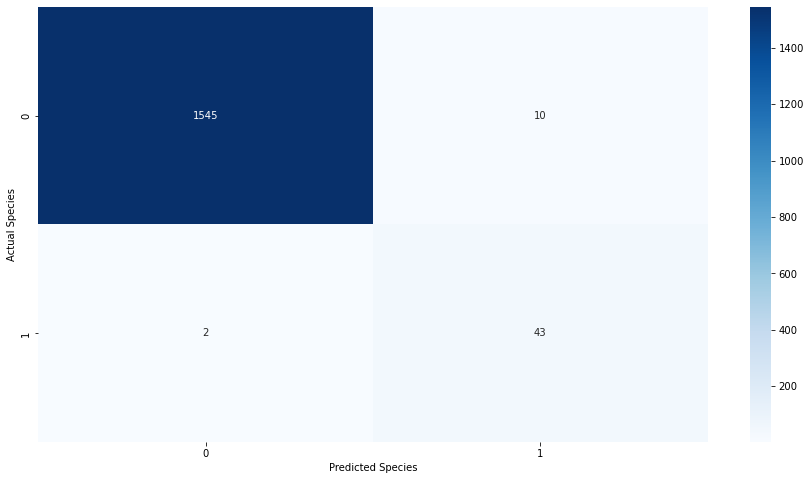

In [37]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [38]:
accuracy_score(y_test, svm_pred_2)

0.9925

In [39]:
#Polynomial Kernal

In [40]:
svm_poly = SVC(kernel = 'poly')

In [41]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [42]:
svm_poly_pred = svm.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, svm_poly_pred)
cm

array([[1545,   10],
       [   2,   43]])

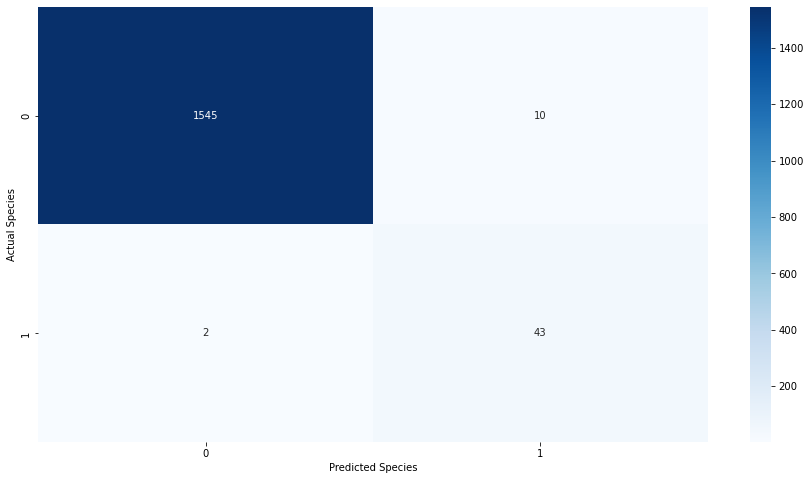

In [44]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [45]:
accuracy_score(y_test, svm_poly_pred)

0.9925

In [78]:
svm_poly = SVC(kernel = 'poly', C = 125)

In [79]:
svm_poly.fit(X_train,y_train)

SVC(C=125, kernel='poly')

In [80]:
svm_poly_pred_1 = svm_poly.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, svm_poly_pred_1)
cm

array([[1552,    3],
       [   6,   39]])

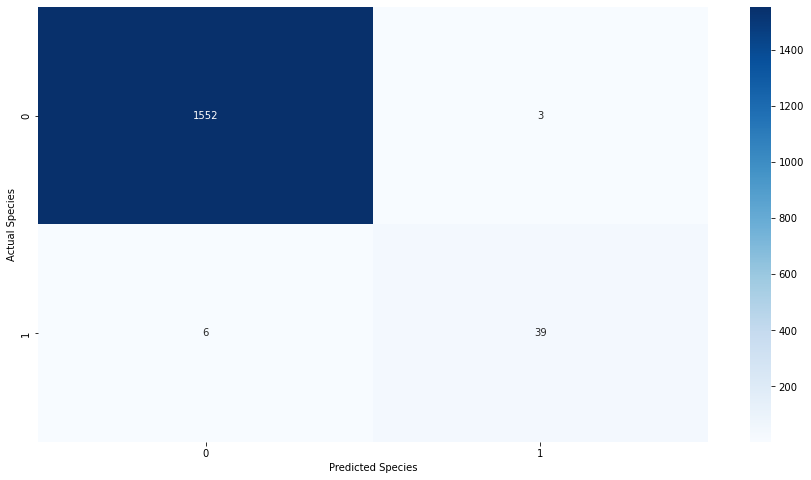

In [82]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [51]:
accuracy_score(y_test, svm_poly_pred_1)

0.994375

In [52]:
svm_poly = SVC(kernel = 'poly', C = 340)

In [53]:
svm_poly.fit(X_train,y_train)

SVC(C=340, kernel='poly')

In [54]:
svm_poly_pred_2 = svm_poly.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, svm_poly_pred_2)

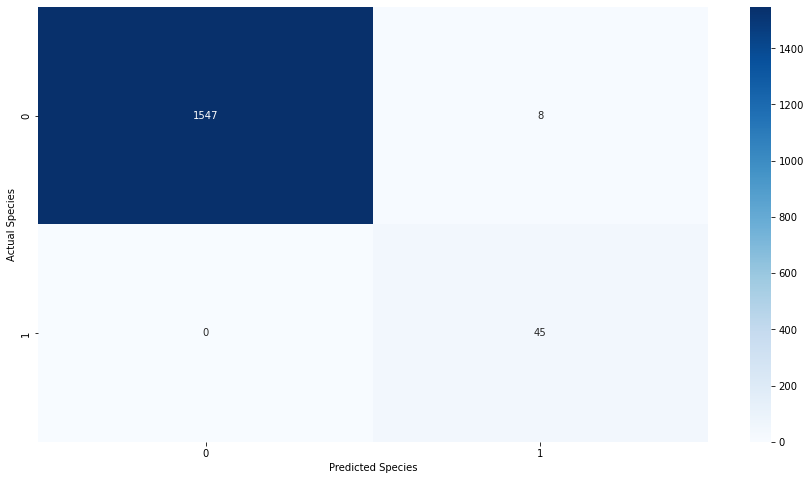

In [56]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [57]:
accuracy_score(y_test, svm_poly_pred_2)

0.995

In [58]:
#Linear Kernal

In [59]:
svm_lin = SVC(kernel = "linear")

In [60]:
svm_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [61]:
y_pred_lin = svm_lin.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred_lin)

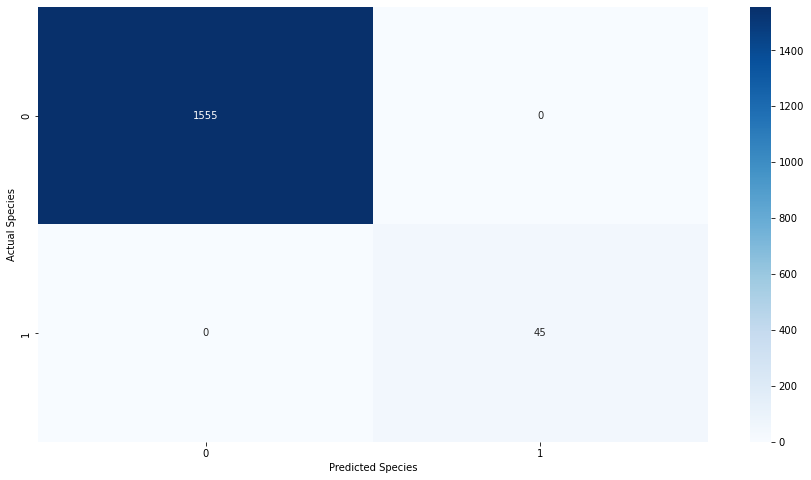

In [63]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [64]:
accuracy_score(y_test, y_pred_lin)

1.0

In [65]:
svm_lin = SVC(kernel = "linear", C = 85)

In [66]:
svm_lin.fit(X_train,y_train)

SVC(C=85, kernel='linear')

In [67]:
y_pred_lin1 = svm_lin.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred_lin1)
cm

array([[1555,    0],
       [   0,   45]])

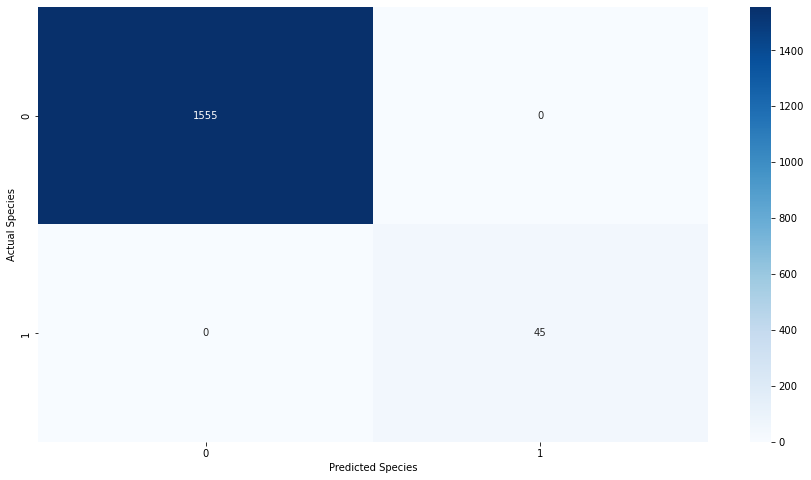

In [69]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [70]:
accuracy_score(y_test, y_pred_lin)

1.0

In [71]:
svm_lin = SVC(kernel = "linear", C = 367)

In [72]:
svm_lin.fit(X_train,y_train)

SVC(C=367, kernel='linear')

In [73]:
y_pred_lin2 = svm_lin.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[1555,    0],
       [   0,   45]])

In [75]:
accuracy_score(y_test, y_pred_lin)

1.0